<a href="https://colab.research.google.com/github/hungpham1406/Discrete-Project-Code/blob/main/LSTM_Model_gg_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This predict model uses Long Short Term Memory (LSTM) to predict the stock price of a corporation

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
pip install vnstock

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vnstock import *

In [ ]:
#Get the stock data
df =  stock_historical_data(symbol='PVL', start_date="2022-01-01", end_date='2022-10-31')
#Show the data
df

,Open,High,Low,Close,Volume,TradingDate
0,16000.0,16700.0,16000.0,16200.0,1521592,2022-01-04
1,16200.0,17800.0,16100.0,17800.0,4180638,2022-01-05
2,17500.0,19500.0,17500.0,19300.0,4814448,2022-01-06
3,19500.0,20600.0,19200.0,19200.0,2898764,2022-01-07
4,19100.0,21000.0,18100.0,19900.0,5126016,2022-01-10
...,...,...,...,...,...,...
200,2600.0,2900.0,2600.0,2600.0,672303,2022-10-25
201,2600.0,2700.0,2400.0,2400.0,444100,2022-10-26
202,2400.0,2600.0,2200.0,2600.0,603017,2022-10-27
203,2600.0,2700.0,2500.0,2500.0,304431,2022-10-28


In [ ]:
#Get the number of rows and columns in the data set
df.shape

(205, 6)

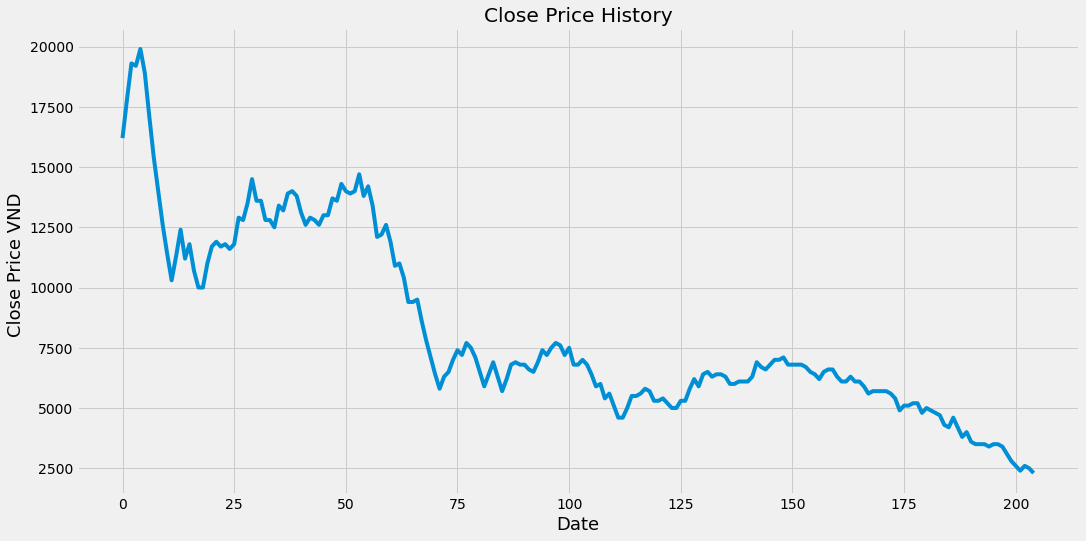

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price VND ', fontsize=18)
plt.show()

In [ ]:
#Creat new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

164

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.78977273],
       [0.88068182],
       [0.96590909],
       [0.96022727],
       [1.        ],
       [0.94318182],
       [0.84090909],
       [0.74431818],
       [0.66477273],
       [0.58522727],
       [0.51704545],
       [0.45454545],
       [0.51136364],
       [0.57386364],
       [0.50568182],
       [0.53977273],
       [0.47727273],
       [0.4375    ],
       [0.4375    ],
       [0.49431818],
       [0.53409091],
       [0.54545455],
       [0.53409091],
       [0.53977273],
       [0.52840909],
       [0.53977273],
       [0.60227273],
       [0.59659091],
       [0.63636364],
       [0.69318182],
       [0.64204545],
       [0.64204545],
       [0.59659091],
       [0.59659091],
       [0.57954545],
       [0.63068182],
       [0.61931818],
       [0.65909091],
       [0.66477273],
       [0.65340909],
       [0.61363636],
       [0.58522727],
       [0.60227273],
       [0.59659091],
       [0.58522727],
       [0.60795455],
       [0.60795455],
       [0.647

In [ ]:
#Create the training data set
#Create the scaled  training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(80, len(train_data)):
  x_train.append(train_data[i-80:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 81:
    print(x_train)
    print(y_train)
    print()

[array([0.78977273, 0.88068182, 0.96590909, 0.96022727, 1.        ,
       0.94318182, 0.84090909, 0.74431818, 0.66477273, 0.58522727,
       0.51704545, 0.45454545, 0.51136364, 0.57386364, 0.50568182,
       0.53977273, 0.47727273, 0.4375    , 0.4375    , 0.49431818,
       0.53409091, 0.54545455, 0.53409091, 0.53977273, 0.52840909,
       0.53977273, 0.60227273, 0.59659091, 0.63636364, 0.69318182,
       0.64204545, 0.64204545, 0.59659091, 0.59659091, 0.57954545,
       0.63068182, 0.61931818, 0.65909091, 0.66477273, 0.65340909,
       0.61363636, 0.58522727, 0.60227273, 0.59659091, 0.58522727,
       0.60795455, 0.60795455, 0.64772727, 0.64204545, 0.68181818,
       0.66477273, 0.65909091, 0.66477273, 0.70454545, 0.65340909,
       0.67613636, 0.63068182, 0.55681818, 0.5625    , 0.58522727,
       0.54545455, 0.48863636, 0.49431818, 0.46022727, 0.40340909,
       0.40340909, 0.40909091, 0.35795455, 0.3125    , 0.27272727,
       0.23295455, 0.19886364, 0.22727273, 0.23863636, 0.2670

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(84, 80, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
3/3 [==============================] - 6s 85ms/step - loss: 0.0231
Epoch 2/50
3/3 [==============================] - 0s 84ms/step - loss: 0.0061
Epoch 3/50
3/3 [==============================] - 0s 85ms/step - loss: 0.0041
Epoch 4/50
3/3 [==============================] - 0s 85ms/step - loss: 0.0021
Epoch 5/50
3/3 [==============================] - 0s 80ms/step - loss: 0.0033
Epoch 6/50
3/3 [==============================] - 0s 79ms/step - loss: 0.0021
Epoch 7/50
3/3 [==============================] - 0s 88ms/step - loss: 0.0014
Epoch 8/50
3/3 [==============================] - 0s 75ms/step - loss: 0.0018
Epoch 9/50
3/3 [==============================] - 0s 82ms/step - loss: 0.0016
Epoch 10/50
3/3 [==============================] - 0s 91ms/step - loss: 0.0013
Epoch 11/50
3/3 [==============================] - 0s 80ms/step - loss: 0.0015
Epoch 12/50
3/3 [==============================] - 0s 77ms/step - loss: 0.0014
Epoch 13/50
3/3 [==============================] - 0s 78ms/st

In [ ]:
#Create the testing data set
test_data = scaled_data[training_data_len - 80: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] #all of the values that we want model to predict
for i in range(80, len(test_data)):
  x_test.append(test_data[i-80:i, 0])
  

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


2/2 [==============================] - 1s 18ms/step


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse

1177.7744497903964

<ipython-input-21-c8f73ed83531>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


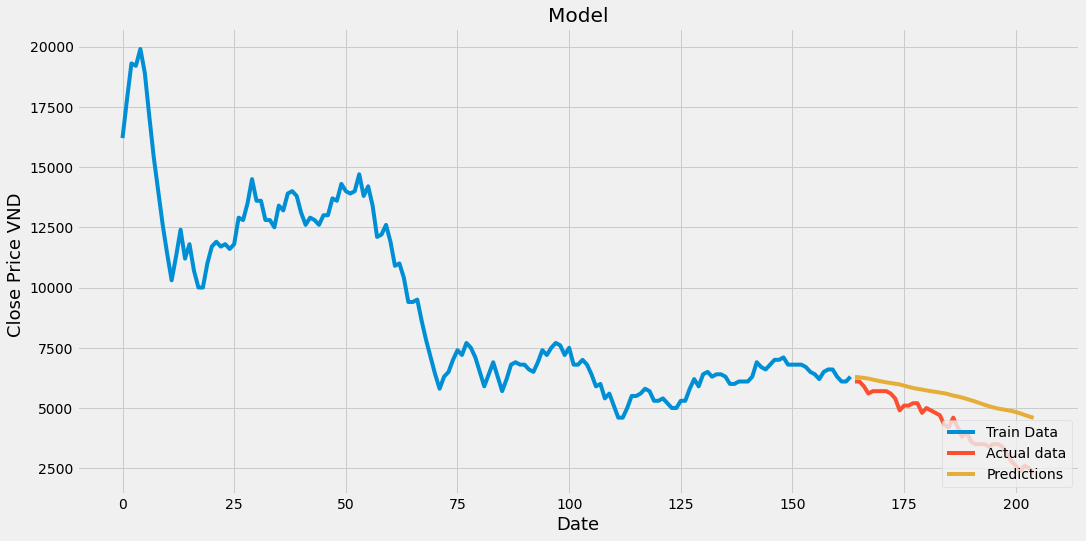

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price VND ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train Data', 'Actual data', 'Predictions'], loc='lower right')
plt.show()